In [2]:
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import pandas as pd
df = pd.read_csv("./attack2.csv",index_col = 0).reset_index()
del df["href"]
df.head()

,case number,year,type,country,area,location,activity,name,sex,age,time,species
0,2018.06.25,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,18h00,White shark
1,2018.06.18,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,14h00 -15h00,NaN
2,2018.06.09,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,07h45,NaN
3,2018.06.08,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,NaN,2 m shark
4,2018.06.04,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,NaN,"Tiger shark, 3m"


Tendréis que realizar gráficas para contestar a las siguientes preguntas:

1- **¿Cuál es la frecuencia de cada una de las categorías de la columna sex?**

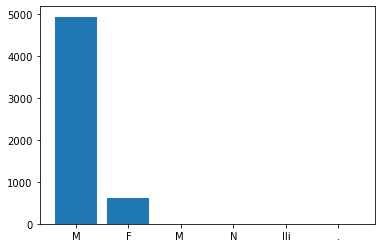

In [3]:
repeticion_valores = df["sex "].value_counts()

repeticion_valores_df= pd.DataFrame(repeticion_valores).reset_index()

x= repeticion_valores_df["index"]
y=repeticion_valores_df["sex "]


plt.figure()
plt.bar(x,y)
plt.show()

**2. ¿Cuál es el porcentaje de nulos por columna?**


In [4]:
nulos = df.isnull().sum() / len((df)*100)
nulos.head(3)

case number    0.000164
year           0.000000
type           0.000654
dtype: float64


 **Usa un pie chart donde incluyáis el porcentaje de cada variable en el interior del quesito. Para eso tendréis que usar el parámetro autopct, aquí algo de documentación.**

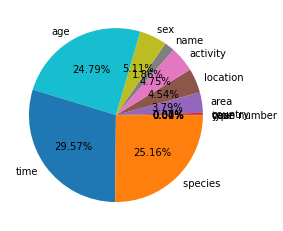

In [5]:
columnas = df.columns
plt.figure()
plt.pie(nulos, labels = columnas ,autopct='%1.2f%%')
plt.show()


**3. ¿Cuál es número total de valores únicos de cada una de las columnas categóricas del dataframe?**

In [6]:
#Primero vemos las columnas que tenemos en nuestro DF
df.columns

Index(['case number', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex ', 'age', 'time', 'species '],
      dtype='object')

In [7]:
#Vamos practicando y planteando el objetivo
valor_unico= df["year"].unique()
valor_unico.size

207

In [8]:
x = df.columns
y=[]

#Podemos hacerlo con un buble
for valor in x:
       y.append(df[valor].unique().size)

# O con una lista de comprensión
y = [(df[valor].unique().size) for valor in x]

print("x:",x)
print("y:",y)

x: Index(['case number', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex ', 'age', 'time', 'species '],
      dtype='object')
y: [6114, 207, 9, 202, 792, 4021, 1485, 5119, 7, 157, 367, 1530]


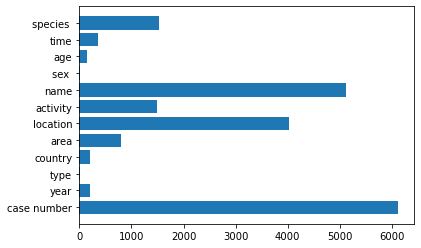

In [9]:
#Ahora con nuestros valores vamos a trasladar los datos a una gráfica.
x = df.columns
y = [(df[valor].unique().size) for valor in x]

#Gráfica lineas barh
plt.figure()
plt.barh(x,y)
plt.show()


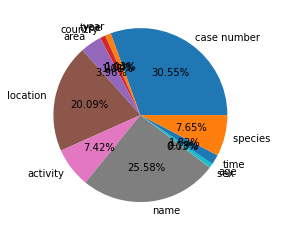

In [10]:
#Gráfica de tartas
x = df.columns
y = [(df[valor].unique().size) for valor in x]

plt.figure()
plt.pie(y, labels = x ,autopct='%1.2f%%')
plt.show()

4. **Filtrad los datos para quedarnos solo con los datos de USA.**

**¿Cuántos ataques de tiburones hubo en USA a lo largo del tiempo? Muestra solo los que hayan ocurrido del 2000 en adelante**

In [11]:
attack5 = df[((df['country'] == 'USA')) & ((df['year'] > 2000))]
attack5.head(3)

,case number,year,type,country,area,location,activity,name,sex,age,time,species
0,2018.06.25,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,18h00,White shark
1,2018.06.18,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,14h00 -15h00,NaN
2,2018.06.09,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,07h45,NaN


In [12]:
valores = attack5["year"].value_counts()
df_valores= valores.reset_index()
df_valores.head(3)

,index,year
0,2015.0,73
1,2007.0,66
2,2014.0,65


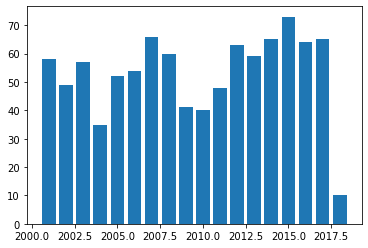

In [18]:

x=df_valores["index"]
y=df_valores["year"]

plt.bar(x,y)
plt.show()

**En función del tipo, ¿cuántos ataques de cada tipo de tiburones hubo en USA? Muestra los resultados en un gráfico de líena.**

In [14]:
attack6 = df[df['country'] == 'USA']

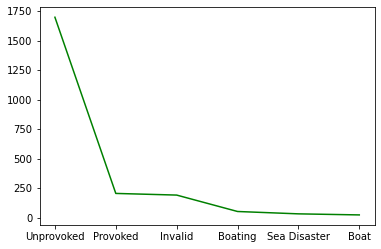

In [19]:
tipo_ataques= attack6.type.value_counts().reset_index()

x= tipo_ataques["index"]
y= tipo_ataques["type"]

plt.plot(x,y,c="g")
plt.show()

5.**Filtrad los datos para Spain:**

**¿Cuántos ataques de tiburones hubo en España a lo largo del tiempo? Muestra solo los que hayan ocurrido del 2000 en adelante.**

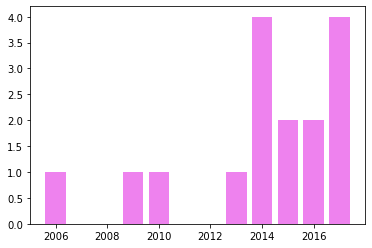

In [20]:
attackspain = df[((df['country'] == 'SPAIN')) & ((df['year'] > 2000))]

attackspain_df= attackspain["year"].value_counts().reset_index()

x=attackspain_df["index"]
y=attackspain_df["year"]

plt.bar(x, y,color="violet")
plt.show()

**En función del tipo, ¿cuántos ataques de cada tipo de tiburones hubo en España? Muestra los resultados en un gráfico de líena.**

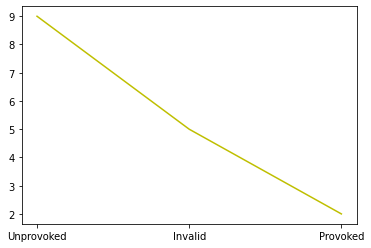

In [21]:
attackspain_tipo= df[((df['country'] == 'SPAIN'))]

attackspain_tipo2= attackspain.type.value_counts().reset_index()

x=attackspain_tipo2["index"]
y=attackspain_tipo2["type"]

plt.plot(x,y,c="y")
plt.show()
